In [32]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
os.chdir('/Users/allenlu/Desktop/twitter_project')
tweets = pd.read_csv("tweets.csv",encoding = "ISO-8859-1")
len(tweets["text"])

98484

Read in data set created by scarping from tweepy

In [36]:
def colleges(row):
    colleges = []
    text = row['text'].lower()
    if 'ucla' in text:
        colleges.append('UCLA')
    if 'usc' in text:
        colleges.append('USC')
    if 'stanford'in text:
        colleges.append('Stanford')
    return ",".join(colleges)
tweets['colleges'] = tweets.apply(colleges,axis=1)
tweets = tweets[tweets['colleges']!='']
tweets['colleges'].value_counts()

USC                  31406
Stanford              5638
UCLA                  5471
UCLA,USC               171
USC,Stanford           130
UCLA,Stanford           58
UCLA,USC,Stanford        7
Name: colleges, dtype: int64

Created column that sorts tweets into school categories

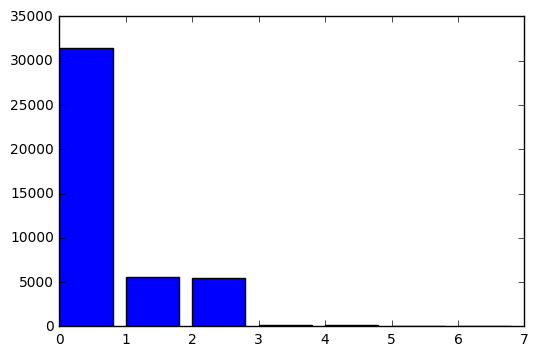

USC                  31406
Stanford              5638
UCLA                  5471
UCLA,USC               171
USC,Stanford           130
UCLA,Stanford           58
UCLA,USC,Stanford        7
Name: colleges, dtype: int64

In [37]:
counts = tweets['colleges'].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()
counts

Visualize the amount of tweets for each school

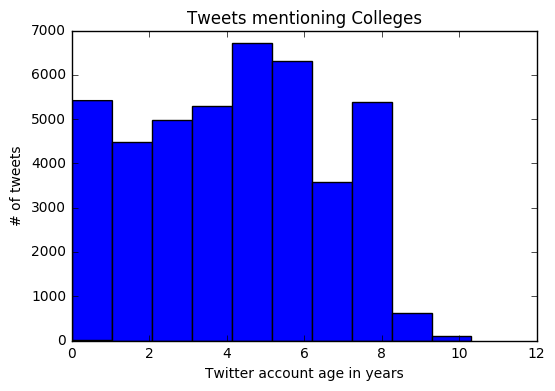

In [38]:
from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
#time from now to when the user created their account
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning Colleges")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

Graph on how recent twitter accounts about colleges were

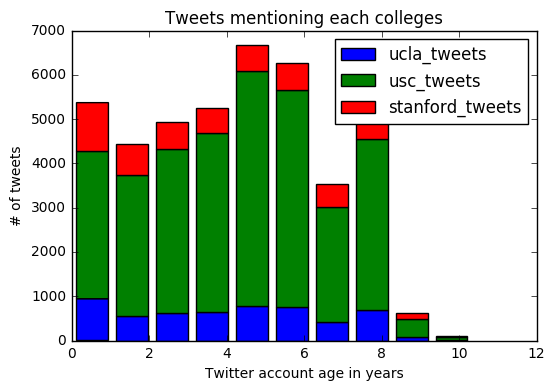

In [39]:
ucla_tweets = tweets["user_age"][tweets["colleges"] == "UCLA"]
usc_tweets = tweets["user_age"][tweets["colleges"] == "USC"]
stanford_tweets = tweets["user_age"][tweets["colleges"] == "Stanford"]
plt.hist([
        ucla_tweets, 
        usc_tweets, 
        stanford_tweets
    ], 
    stacked=True, 
    label=["ucla_tweets", "usc_tweets", "stanford_tweets"]
)
plt.legend()
plt.title("Tweets mentioning each colleges")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
#plt.annotate('More Trump tweets', xy=(2, 35000), xytext=(3, 35000),
            #arrowprops=dict(facecolor='black'))
plt.show()

Shows the distribution of such accounts by school, we can see USC has a disaportionate amount of tweets from acounts that are 4-5 years old.

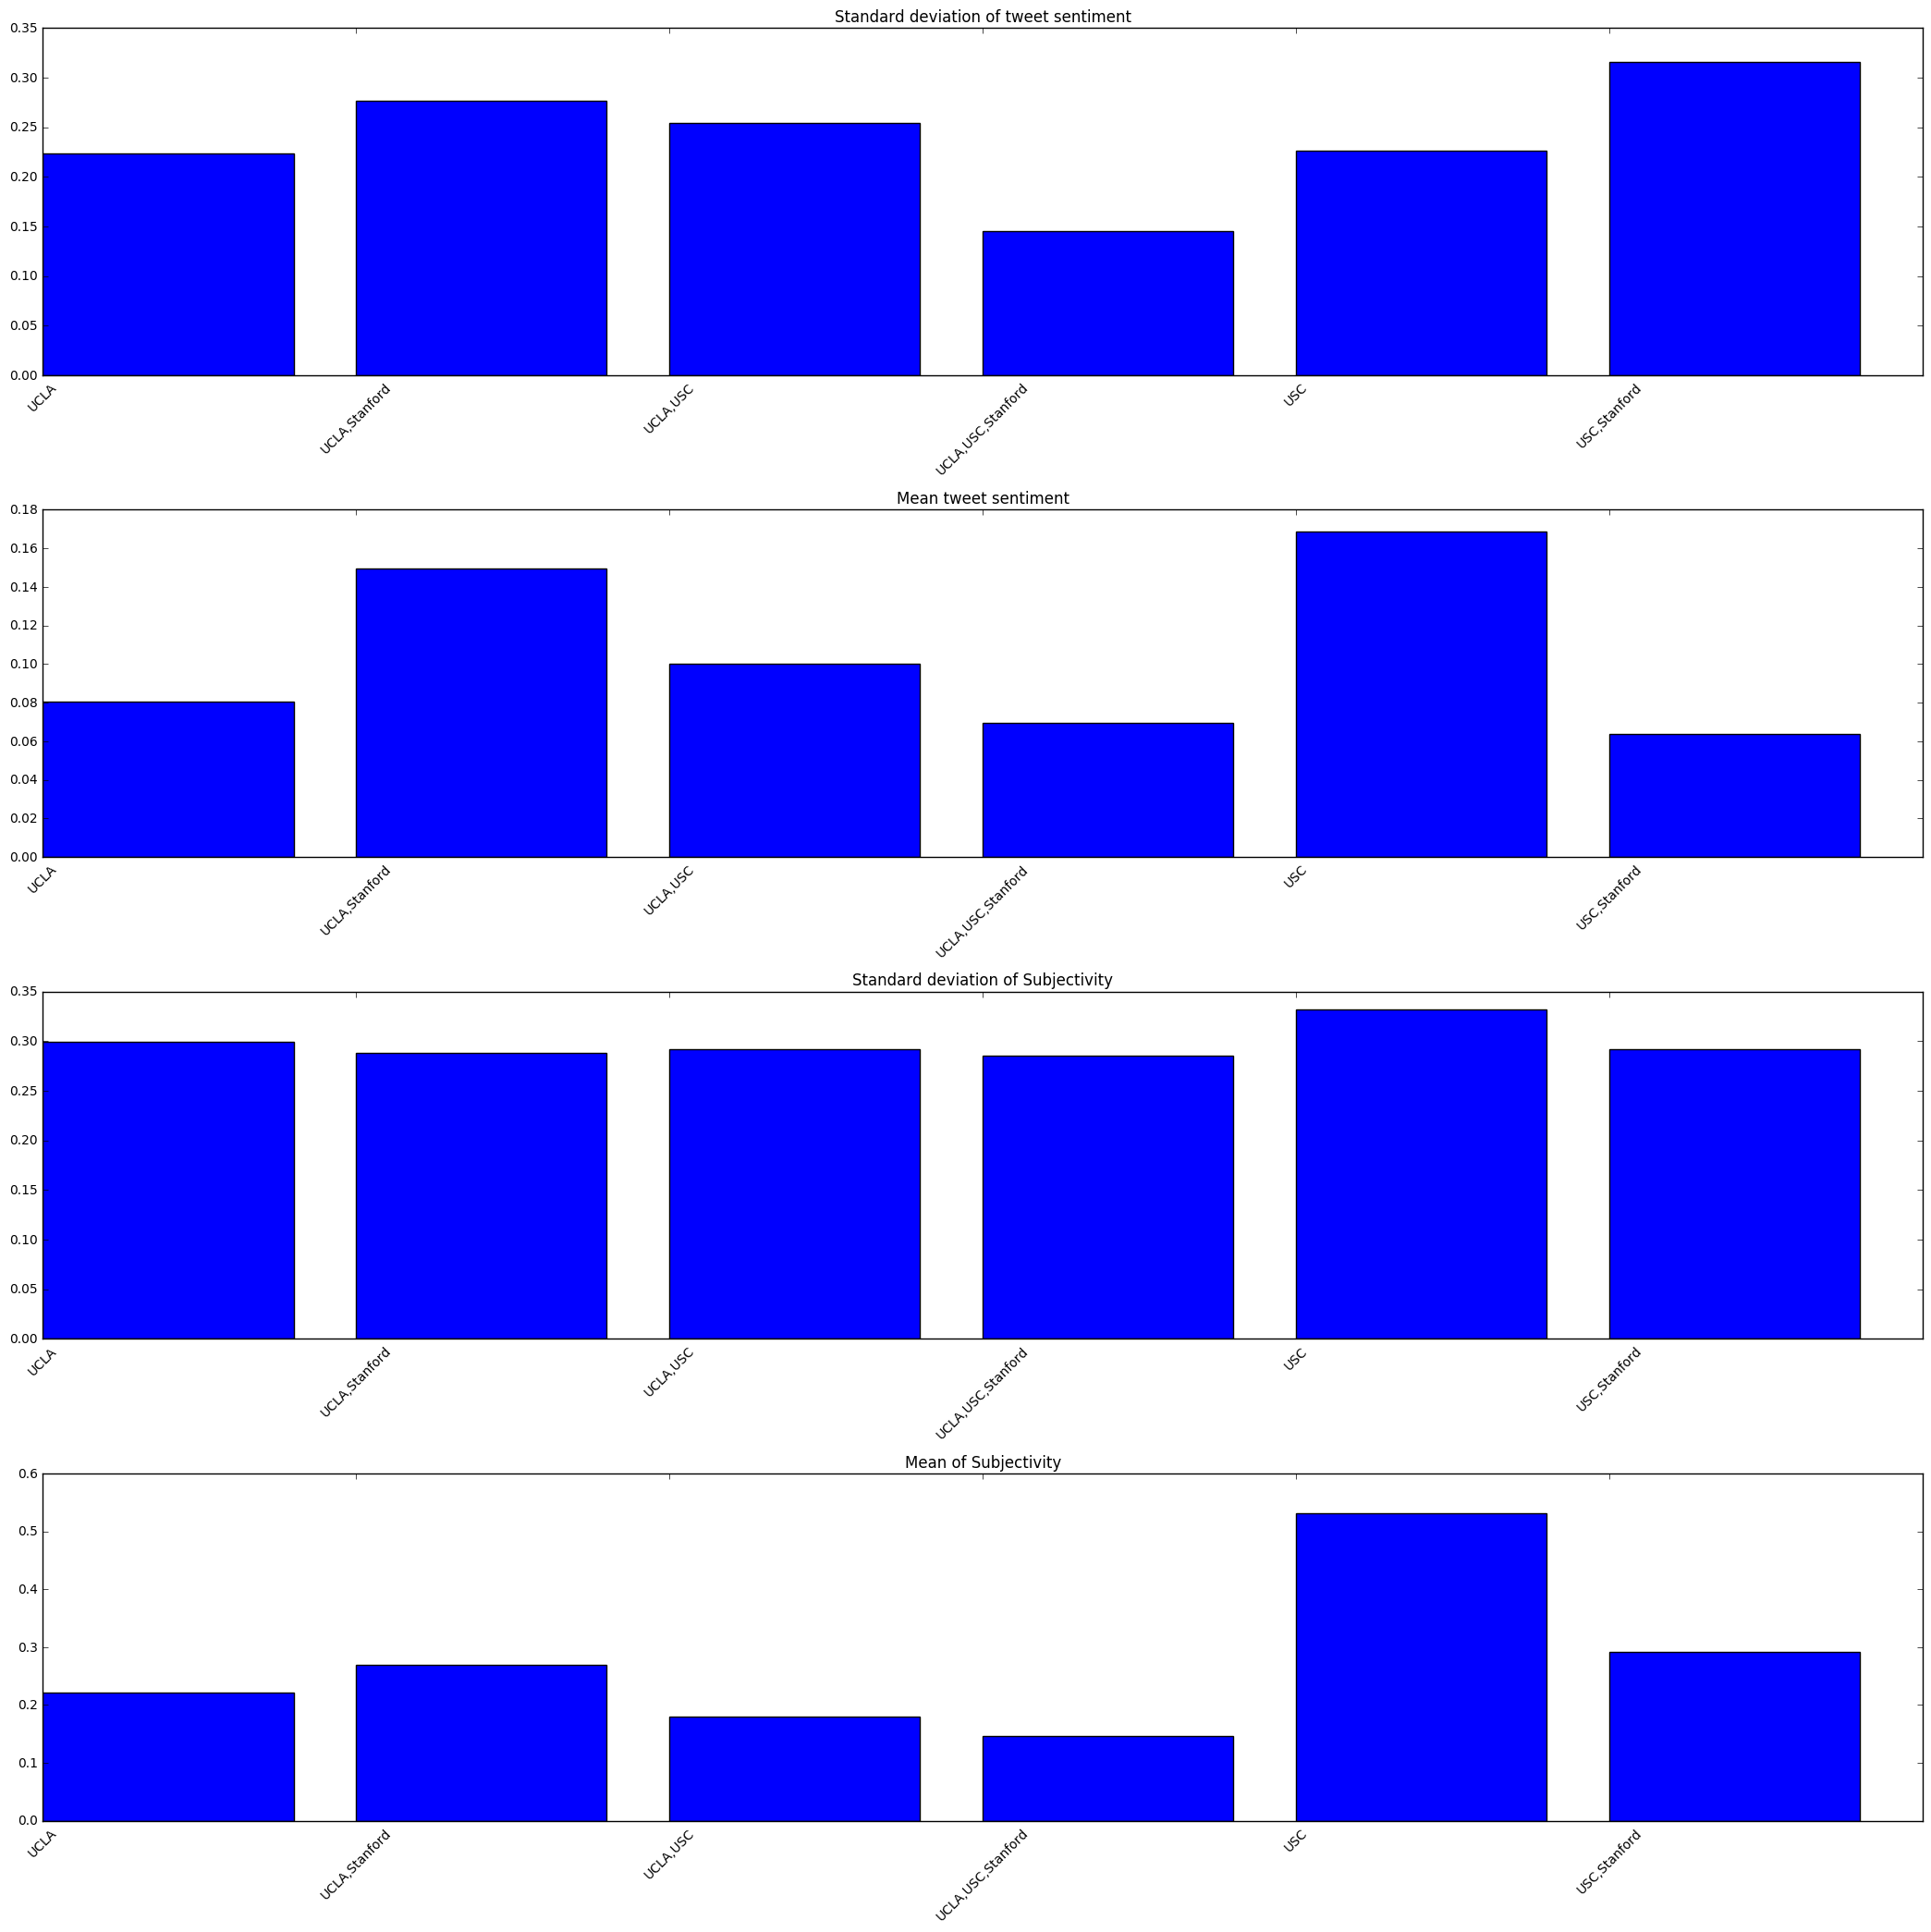

In [41]:
gr = tweets.groupby("colleges").agg([np.mean, np.std]) #gets the mean and std of everything on the candidate

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(21, 21))
ax0, ax1, ax2, ax3 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
stdsentiment = gr["subjectivity"]["std"].iloc[1:]
stdmean = gr["subjectivity"]["mean"].iloc[1:]

ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

ax2.bar(range(len(stdsentiment)),stdsentiment)
ax2.set_xticklabels(stdsentiment.index,rotation=45)
ax2.set_title('Standard deviation of Subjectivity')

ax3.bar(range(len(stdmean)),stdmean)
ax3.set_xticklabels(stdmean.index,rotation=45)
ax3.set_title('Mean of Subjectivity')

plt.tight_layout()
plt.show()

Found out polarity (1 being positive, -1 being negative) and subjectivity (1 being subjective, 0 being objective) of the average tweets for each school

In [42]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)
#Apply is used to find out in 1 specific column

tl = {}
for college in ["UCLA", "USC", "Stanford"]:
    tl[college] = tweets["tweet_length"][tweets["colleges"] == college].value_counts()

Break apart types of tweets into lenghts to check length of tweets done for each school

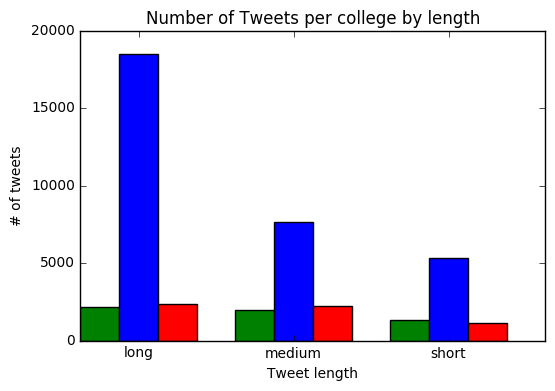

In [43]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["UCLA"], width, color='g')
ax.bar(x + width, tl["USC"], width, color='b')
ax.bar(x + (width * 2), tl["Stanford"], width, color='r')
ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per college by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()

Visualize tweet length